This jupyter notebook is for testing painting GREAT array profiles onto the sky

In [1]:
#Import library
import sens_map_lib


import numpy as np

from astropy.modeling import models
from matplotlib import pyplot

Total beam signal: 5.000000000000071
Total beam noise: 0.008
Total beam S/N: 625.0000000000089
total signal = 1800000.0000000002
total noise =  2277.99449683003
Total S/N:  1.3169478697927872
min noise=  0.008


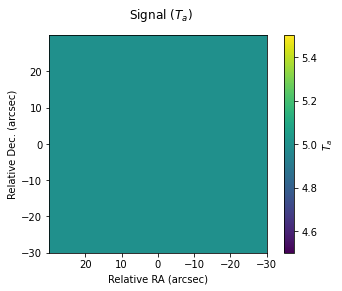

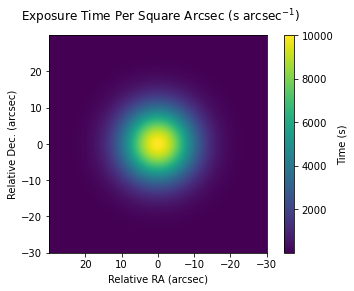

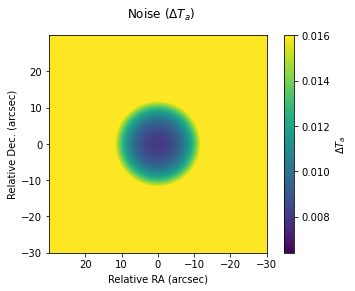

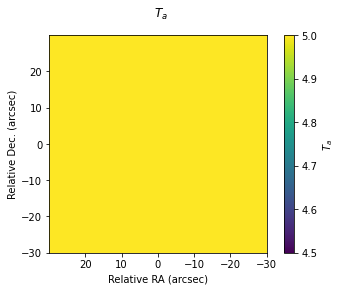

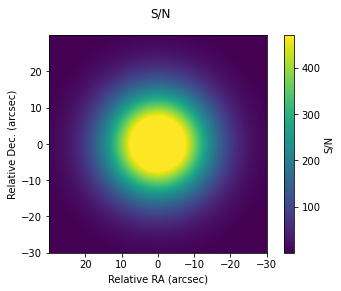

In [2]:
#Checking S/N calculations for a single 4G1 pointing

sky_grid = sens_map_lib.sky([-30.0,30.0], [-30.0,30.0], 0.1) #Generate sky object-

sky_grid.uniform(5.0) #Give sky a 5 K uniform signal

#Generate a single pointing
fg1_array = sens_map_lib.FG1_array(freq=0.6e12)
fg1_array.single_point(sky_grid, x=0., y=0., array_angle=0., time=10000.0, cycles=1)

#Calculate
sky_grid.simulate_observation(Tsys=400.0)

#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')

#Give final signal and noise
goodpix = np.isfinite(sky_grid.data) & np.isfinite(sky_grid.noise)
# print('Signal = ', np.nansum(sky_grid.data[goodpix]))
# print('Noise = ', np.nansum(sky_grid.noise[goodpix]**2)**0.5)
print('min noise= ', np.nanmin(sky_grid.noise[goodpix]))
# print('max S/N = ', np.nanmax(sky_grid.data[goodpix])/np.nanmax(sky_grid.noise[goodpix]**2)**0.5)

In [3]:
#Test optimal extraction (based on Horne et al. (1986))
p = 1
p = p/np.nansum(p)
v = sky_grid.noise**2 #/ sky_grid.exptime**0.5
signal = np.nansum(sky_grid.data  * p / v) / np.nansum(p**2 / v)
var = np.nansum(p) / np.nansum(p**2 / v)
noise = var**0.5
print('Optimal Extraction')
print(signal)
print(noise)
print((signal/noise)/np.size(sky_grid.data)**0.5)

print('Sum Extraction')
signal = np.nansum(sky_grid.data)
noise = np.nansum(sky_grid.noise**2)**0.5
print(signal)
print(noise)
print((signal/noise)/np.size(sky_grid.data)**0.5)

Optimal Extraction
5.000000000000071
4.5094003597647075e-05
184.7991455291468
Sum Extraction
1800000.0000000237
2277.9944968300347
1.3169478697928019


In [4]:
sky_grid.area

3600.0

In [5]:
# #Test Array OTF Mapping with a multiple blocks

# sky_grid = sens_map_lib.sky([-300,300], [-300,300], 2.0) #Generate sky object


# #ring = models.Ring2D(amplitude=1.0, x_0=0., y_0=0., r_in=0.0, r_out=50.0)
# #sky_grid.input(ring) #Add in artifical ring signal

# #Set parameters for 2D gaussian
# x = 0.
# y = 0.
# amplitude = 10.0
# fwhm = 10.0
# stddev = fwhm / (2.0 * np.sqrt(np.log(2.0)))#Convert FWHM to stddev
# point_source_gaussian = models.Gaussian2D(amplitude=amplitude, x_mean=x, y_mean=y, x_stddev=stddev, y_stddev=stddev)
# sky_grid.input(point_source_gaussian)


# lfa_array = sens_map_lib.LFAV_array()
# lfa_array.array_otf(sky_grid, nblock_scan=2, nblock_perp=2, x=0.0, y=0., step=5.2, length=3.0, time=2.0, cycles=5, map_angle=0., direction='x', nscans=4)


# #Simulate the observations
# sky_grid.simulate_observation(Tsys=2480.0)

# #Print S/N
# print('S/N = ', sky_grid.s2n())

# #Show results
# pyplot.figure()
# sky_grid.plot('signal')
# pyplot.figure()
# sky_grid.plot('exposure')
# pyplot.figure()
# sky_grid.plot('noise')
# pyplot.figure()
# sky_grid.plot('data')
# pyplot.figure()
# sky_grid.plot('s2n')

# print('Block x centers: ', sky_grid.x_points)
# print('Block y centers: ', sky_grid.y_points)


In [6]:
pdb

Automatic pdb calling has been turned ON


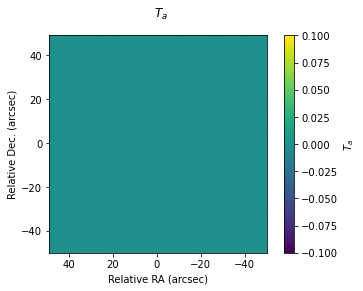

In [7]:
#Generate sky object
sky_grid = sens_map_lib.sky([-50,50], [-50,50], 1.0)

#Plot empty sky grid
sky_grid.plot('data')

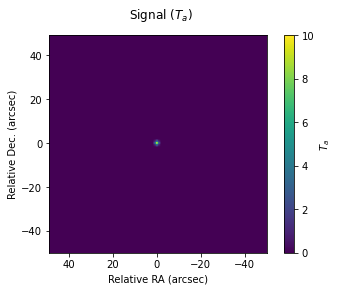

In [8]:
#Create a point source to model the "true" signal on the sky
#This source will be a 2D gaussian gererated from an astropy.modeling object

#Set parameters for 2D gaussian
x = 0.
y = 0.
amplitude = 10.0
fwhm = 1.0
stddev = fwhm / (2.0 * np.sqrt(np.log(2.0)))#Convert FWHM to stddev

#Create 2D gaussian object and import it into the "the" signal omn the sky
point_source_gaussian = models.Gaussian2D(amplitude=amplitude, x_mean=x, y_mean=y, x_stddev=stddev, y_stddev=stddev)
sky_grid.input(point_source_gaussian)

#Plot the "true" signal on the sky
sky_grid.plot('signal')

In [9]:
#Generate an LFA array object
lfa_array = sens_map_lib.LFAV_array()
hfa_array =  sens_map_lib.HFA_array()

Total beam signal: 0.09994353116401378
Total beam noise: 3.8589931196744267
Total beam S/N: 0.025898862232862897
total signal = 87.19550210648238
total noise =  5.782925887832174e+44
Total S/N:  1.5078094341473407e-45


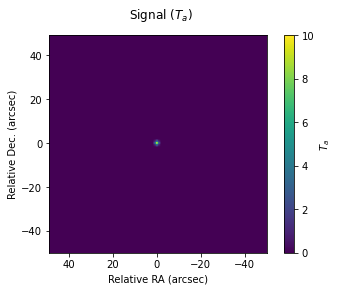

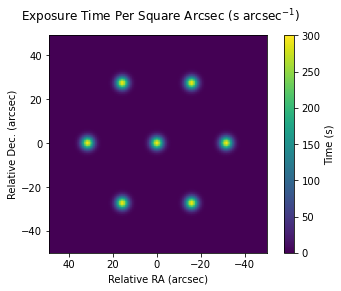

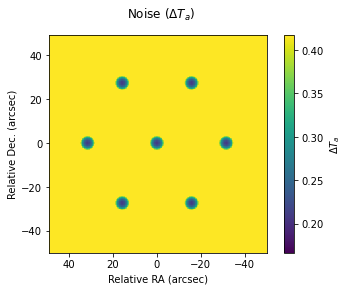

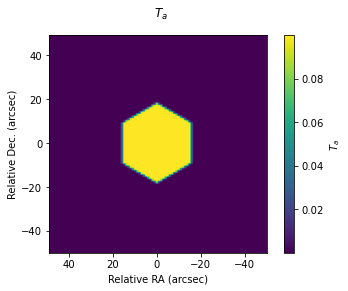

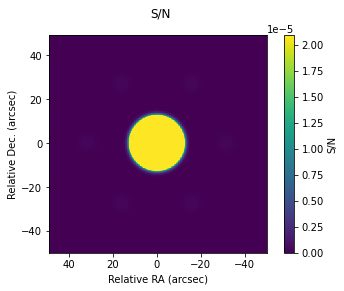

In [10]:
#Simulate a single point observation for the point source

#Clear sky object
sky_grid.clear()

#Test a single pointing being painted onto the sky
lfa_array.single_point(sky_grid, x=0., y=0., array_angle=0.0, time=60.0, cycles=5.0)
#lfa_array.single_point(sky_grid, x=10., y=0., array_angle=0.0, time=60.0, cycles=5.0)


#simulate observagtion
sky_grid.simulate_observation(Tsys=3000.0, deltafreq=1e6, TPOTF=True, Non=5)

#Show results
pyplot.figure()
sky_grid.plot('signal')

pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')

In [11]:
#import cygrid
#cygrid.WcsGrid?

In [12]:
print(np.max(sky_grid.exptime))

300.0


Total beam signal: 4.019952232143576
Total beam noise: 662.9459505369445
Total beam S/N: 0.006063770702404424


/Users/kkaplan1/Desktop/the_greatest_sensitivity_mapper/sens_map_lib.py:393: RuntimeWarning: invalid value encountered in true_divide
  self.data = self.data / (self.exptime) #normalize simulated data by exposure time
/Users/kkaplan1/Desktop/the_greatest_sensitivity_mapper/sens_map_lib.py:396: RuntimeWarning: divide by zero encountered in true_divide
  self.noise = noise  / ((self.exptime)**0.5)
/Users/kkaplan1/Desktop/the_greatest_sensitivity_mapper/sens_map_lib.py:423: RuntimeWarning: overflow encountered in square
  total_noise = bn.nansum(self.noise[goodpix]**2)**0.5


total signal = 2505.399395346678
total noise =  inf
Total S/N:  0.0


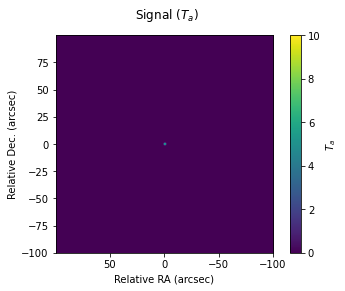

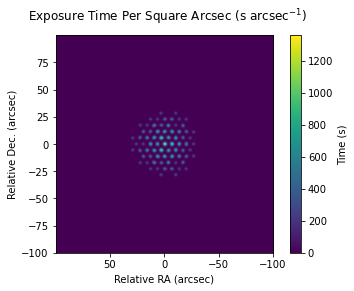

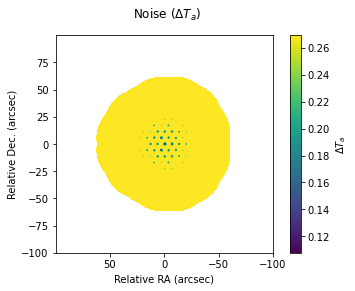

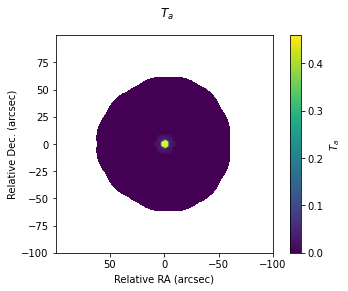

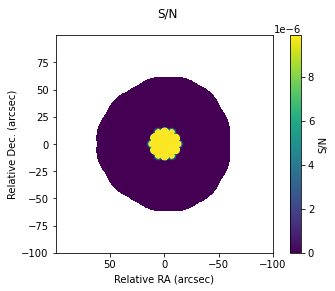

In [13]:
#Simulate a honeycomb map observation for the point source

#Clear sky object
#sky_grid.clear()
sky_grid = sens_map_lib.sky([-100,100], [-100,100], 0.1)


#Set parameters for 2D gaussian
x = 0.
y = 0.
amplitude = 10.0
fwhm = 1.0
stddev = fwhm / (2.0 * np.sqrt(np.log(2.0)))#Convert FWHM to stddev

#Create 2D gaussian object and import it into the "the" signal omn the sky
point_source_gaussian = models.Gaussian2D(amplitude=amplitude, x_mean=x, y_mean=y, x_stddev=stddev, y_stddev=stddev)
sky_grid.input(point_source_gaussian)


#Test a single pointing being painted onto the sky
hfa_array.honeycomb(sky_grid, x=0., y=0., array_angle=0.0, time=30.0, cycles=10.0, LFA=True)
#lfa_array.honeycomb(sky_grid, x=0., y=0., array_angle=0.0, time=30.0, cycles=10.0)
#lfa_array.honeycomb(sky_grid, x=0., y=100, array_angle=0.0, time=30.0, cycles=10.0)



#Simulate the observations
sky_grid.simulate_observation(Tsys=2480.0)

#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')

Total beam signal: 1.7521708873794881
Total beam noise: 662.9459505369445
Total beam S/N: 0.0026430071500705902
total signal = 197.27901047398055
total noise =  inf
Total S/N:  0.0


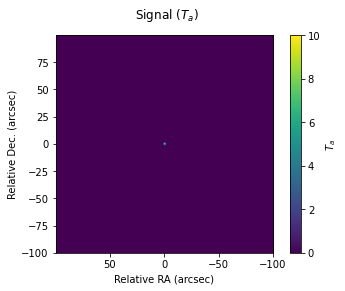

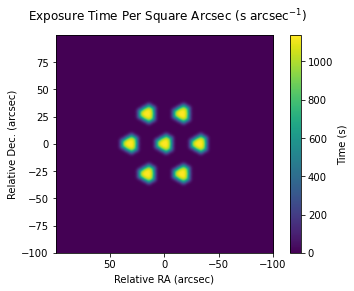

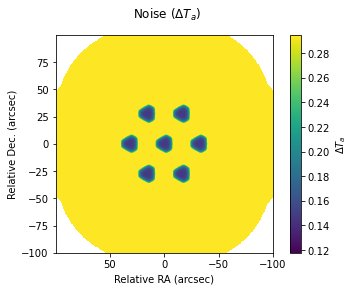

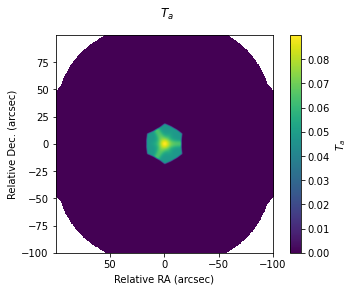

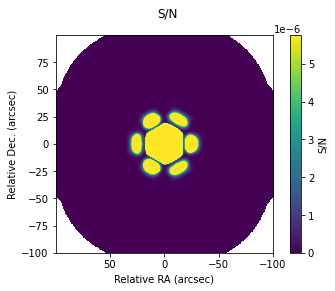

In [14]:
#Simulate a honeycomb map observation for the point source
#for the LFA if the HFA honeycomb is used

#Clear sky object
#sky_grid.clear()
sky_grid = sens_map_lib.sky([-100,100], [-100,100], 0.5)


#Set parameters for 2D gaussian
x = 0.
y = 0.
amplitude = 10.0
fwhm = 1.0
stddev = fwhm / (2.0 * np.sqrt(np.log(2.0)))#Convert FWHM to stddev

#Create 2D gaussian object and import it into the "the" signal omn the sky
point_source_gaussian = models.Gaussian2D(amplitude=amplitude, x_mean=x, y_mean=y, x_stddev=stddev, y_stddev=stddev)
sky_grid.input(point_source_gaussian)


#Test a single pointing being painted onto the sky
lfa_array.honeycomb(sky_grid, x=0., y=0., array_angle=0.0, time=30.0, cycles=10.0, HFA=True)
#lfa_array.honeycomb(sky_grid, x=0., y=100, array_angle=0.0, time=30.0, cycles=10.0)



#Simulate the observations
sky_grid.simulate_observation(Tsys=2480.0)

#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')

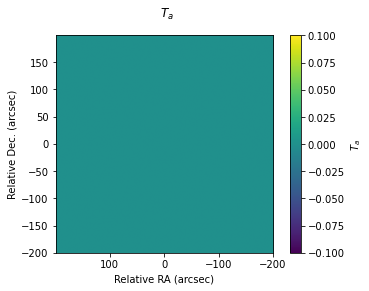

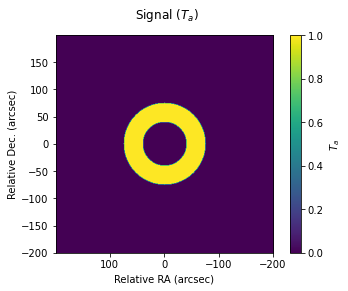

In [15]:
#Now we will test using a ring as our "science target"


#Generate sky object
sky_grid = sens_map_lib.sky([-200,200], [-200,200], 1.0)

#Plot empty sky grid
pyplot.figure()
sky_grid.plot()

#Create "ring" and input into sky_grid
ring = models.Ring2D(amplitude=1.0, x_0=0., y_0=0., r_in=40.0, r_out=75.0)
sky_grid.input(ring)

#Plot the ring
pyplot.figure()
sky_grid.plot('signal')

Total beam signal: 73.88617115330085
Total beam noise: 11482.560690020324
Total beam S/N: 0.006434642337010812
total signal = 21066.2994810052
total noise =  inf
Total S/N:  0.0
total signal = 21066.2994810052
total noise =  inf
S/N =  0.0


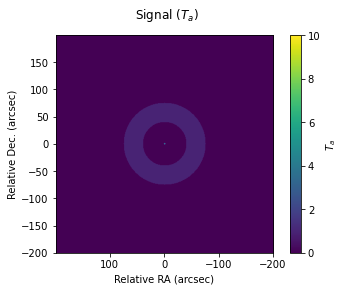

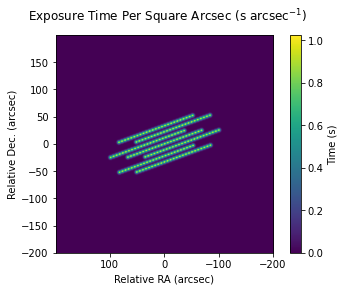

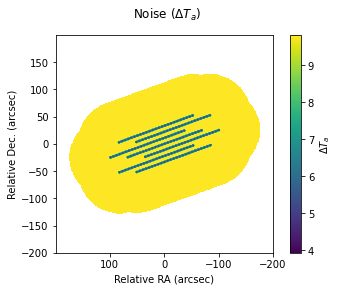

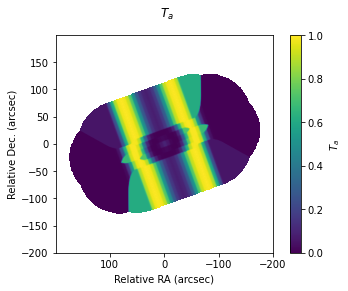

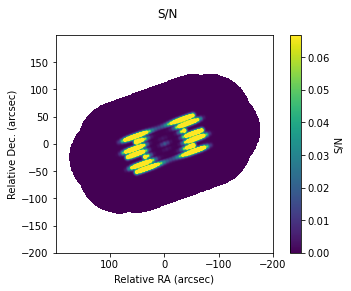

In [16]:
#Test raster mapping the ring and plotting the result

#Clear sky
sky_grid.clear()

#Set parameters for 2D gaussian
x = 0.
y = 0.
amplitude = 10.0
fwhm = 1.0
stddev = fwhm / (2.0 * np.sqrt(np.log(2.0)))#Convert FWHM to stddev

#Create 2D gaussian object and import it into the "the" signal omn the sky
point_source_gaussian = models.Gaussian2D(amplitude=amplitude, x_mean=x, y_mean=y, x_stddev=stddev, y_stddev=stddev)
sky_grid.input(point_source_gaussian)

#Test a raster map on the sky
lfa_array.map(sky_grid, x=0.0, y=0.0, array_angle=-19.1+20.0, map_angle=20.0, nx=25, ny=1,
                    dx=6.0, dy=6.0, time=1.0, cycles=1)


#Simulate the observations
sky_grid.simulate_observation(Tsys=2480.0)

#Print S/N
print('S/N = ', sky_grid.s2n())

#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')

/Users/kkaplan1/opt/anaconda3/lib/python3.7/site-packages/skimage/measure/block.py:76: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)))
/Users/kkaplan1/Desktop/the_greatest_sensitivity_mapper/sens_map_lib.py:416: RuntimeWarning: overflow encountered in square
  self.noise = block_reduce(self.noise**2, factor, func=np.nanmean)**0.5 / factor #Note the 1/factor is actually 1/sqrt(factor*^2) since factor^2 is the number of pixels being averaged together


total signal = 1258.454496229101
total noise =  5.1149940417048345e+152
Total S/N:  2.460324461706815e-152
total signal = 1258.454496229101
total noise =  5.1149940417048345e+152
S/N =  2.460324461706815e-152


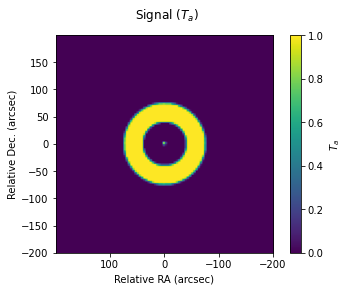

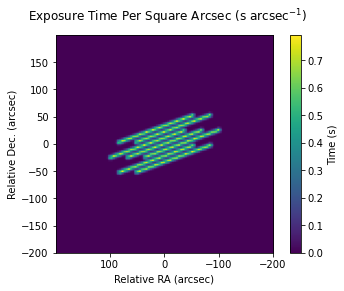

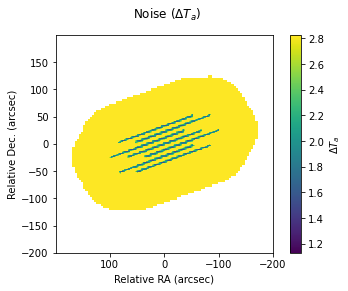

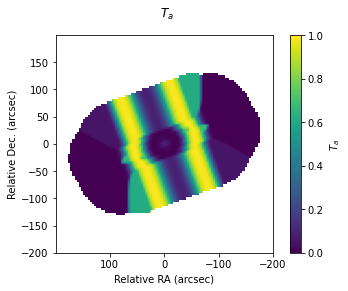

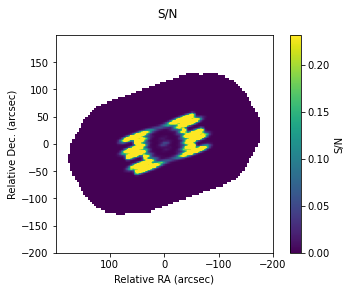

In [17]:
#Test downsampling by a factor of 4
sky_grid.downsample(4)

#Print S/N
print('S/N = ', sky_grid.s2n())

#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')

Total beam signal: 218.1280630560989
Total beam noise: 18271.07784751624
Total beam S/N: 0.011938434331927008
total signal = 196994.30661469811
total noise =  2.4848597083955154e+76
Total S/N:  7.927783848284061e-75


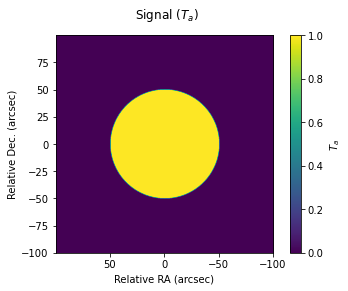

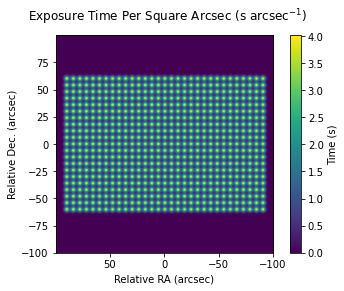

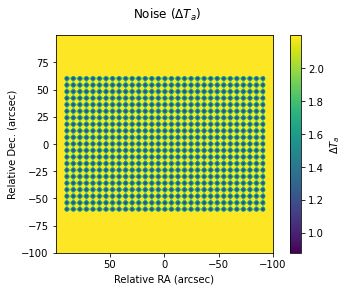

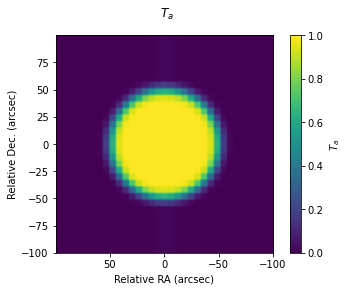

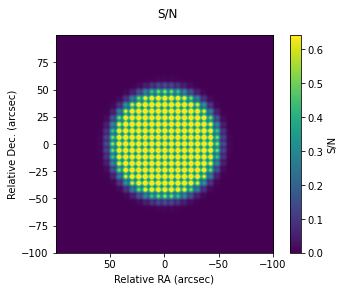

In [18]:
#Test reading in a .aor file and using it to map the ring

sky_grid = sens_map_lib.sky([-100,100], [-100,100], 0.2) #Generate sky object
ring = models.Ring2D(amplitude=1.0, x_0=0., y_0=0., r_in=0.0, r_out=50.0)
sky_grid.input(ring) #Add in artifical ring signal
aors = sens_map_lib.open_aors('test2.aor') #Read in .aor file the result is a list of aor objects
#for aor in aors: #Paint all aors in .aor file onto the exposure map for the sky_grid object, here we assume the LFAH array is used
#    aor.paint(sky_grid, 'LFAH') 
aors[2].paint(sky_grid, '4G4') 
sky_grid.simulate_observation(Tsys=1100.0)#Simulate the observations


#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')

total signal = 30.768891955737544
total noise =  2.1207263807066402e+72
Total S/N:  1.2090547620718656e-72


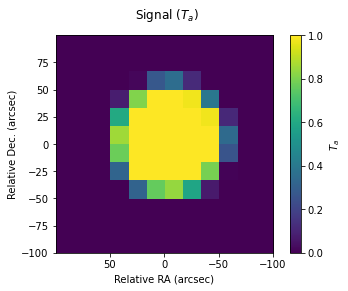

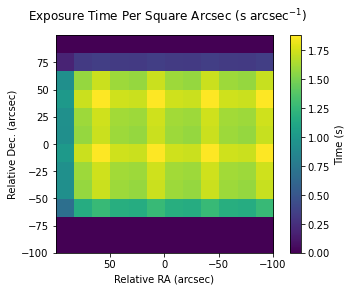

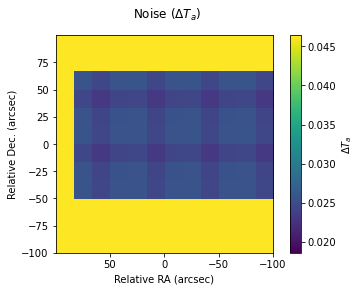

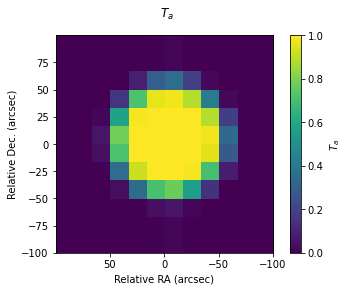

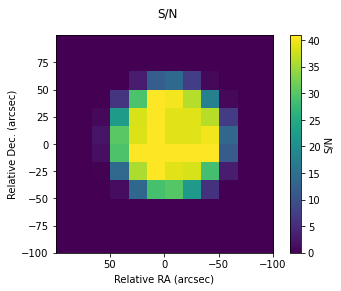

In [19]:
#Test downsampling to 10 arsecond pixels
factor = 16.0 / sky_grid.plate_scale
sky_grid.downsample(factor)

#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')

Total beam signal: 1.451874691994612
Total beam noise: 72472.46246821927
Total beam S/N: 2.0033467092846338e-05
total signal = 566.5732589605162
total noise =  inf
Total S/N:  0.0
total signal = 566.5732589605162
total noise =  inf
S/N =  0.0


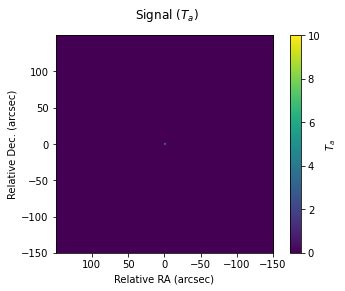

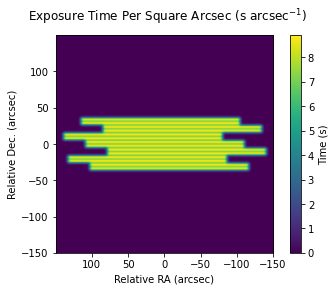

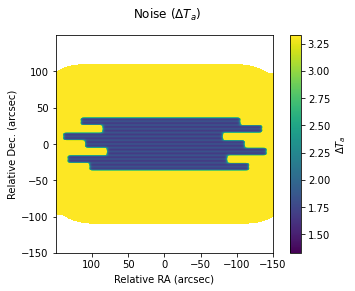

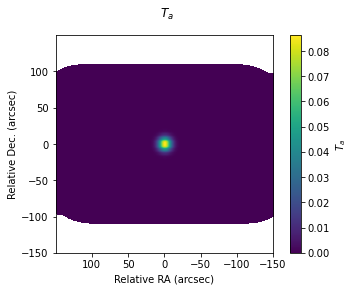

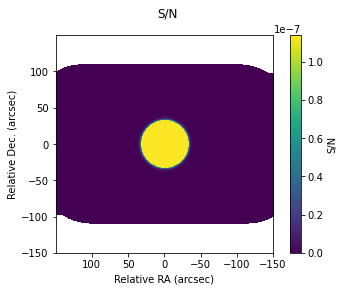

In [20]:
#Test Array OTF Mapping with a single block

sky_grid = sens_map_lib.sky([-150,150], [-150,150], 0.2) #Generate sky object


#ring = models.Ring2D(amplitude=1.0, x_0=0., y_0=0., r_in=0.0, r_out=50.0)
#sky_grid.input(ring) #Add in artifical ring signal

#Set parameters for 2D gaussian
x = 0.
y = 0.
amplitude = 10.0
fwhm = 1.0
stddev = fwhm / (2.0 * np.sqrt(np.log(2.0)))#Convert FWHM to stddev
point_source_gaussian = models.Gaussian2D(amplitude=amplitude, x_mean=x, y_mean=y, x_stddev=stddev, y_stddev=stddev)
sky_grid.input(point_source_gaussian)

lfa_array = sens_map_lib.LFAV_array()
lfa_array.array_otf_block(sky_grid, x=0., y=0., step=3.0, length=3.0, time=1.0, cycles=5, map_angle=0., direction='x', nscans=2)

#Simulate the observations
sky_grid.simulate_observation(Tsys=2480.0)

#Print S/N
print('S/N = ', sky_grid.s2n())

#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')


Total beam signal: 172.5485247986649
Total beam noise: 330250.6408276991
Total beam S/N: 0.0005224774866937752
total signal = 9080.96584146709
total noise =  inf
Total S/N:  0.0
total signal = 9080.96584146709
total noise =  inf
S/N =  0.0


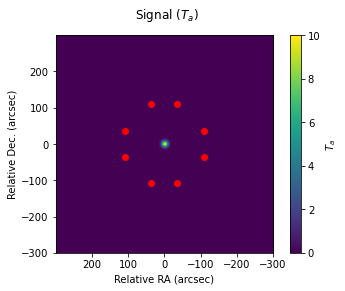

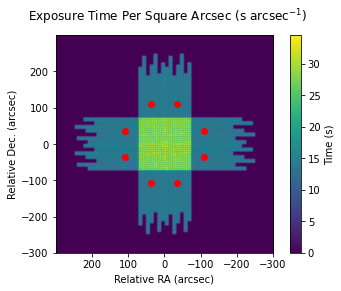

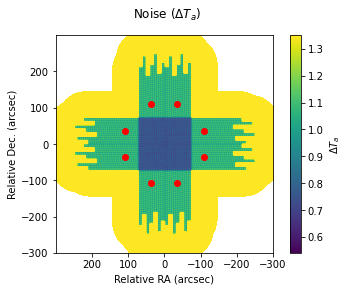

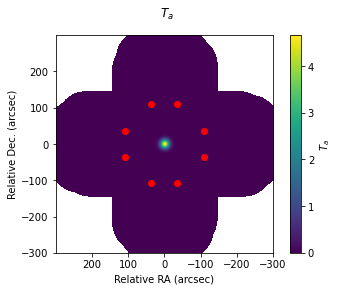

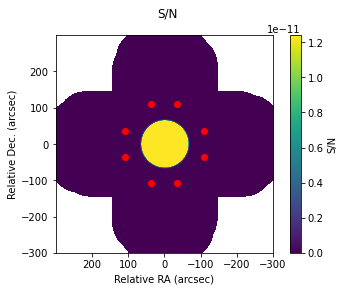

In [21]:
#Test Array OTF Mapping read in from an .aor file

sky_grid = sens_map_lib.sky([-300,300], [-300,300], 0.5) #Generate sky object


#ring = models.Ring2D(amplitude=1.0, x_0=0., y_0=0., r_in=0.0, r_out=50.0)
#sky_grid.input(ring) #Add in artifical ring signal

#Set parameters for 2D gaussian
x = 0.
y = 0.
amplitude = 10.0
fwhm = 10.0
stddev = fwhm / (2.0 * np.sqrt(np.log(2.0)))#Convert FWHM to stddev
point_source_gaussian = models.Gaussian2D(amplitude=amplitude, x_mean=x, y_mean=y, x_stddev=stddev, y_stddev=stddev)
sky_grid.input(point_source_gaussian)

aors = sens_map_lib.open_aors('test.aor') #Read in .aor file the result is a list of aor objects
aors[4].paint(sky_grid, 'LFAH')

#Simulate the observations
sky_grid.simulate_observation(Tsys=3237.0)

#Print S/N
print('S/N = ', sky_grid.s2n())

#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')

Total beam signal: 34.99999999999999
Total beam noise: 14.3939454327158
Total beam S/N: 2.4315779272338336
total signal = 35015.0
total noise =  inf
Total S/N:  0.0
Signal =  35015.00000000001
Noise =  9.347001634042267e+162
min noise=  0.7772
max S/N =  6.433350488934616


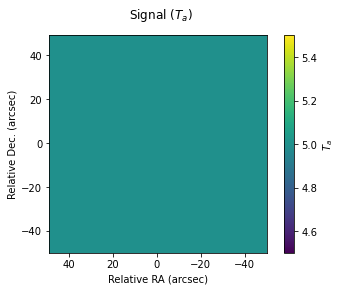

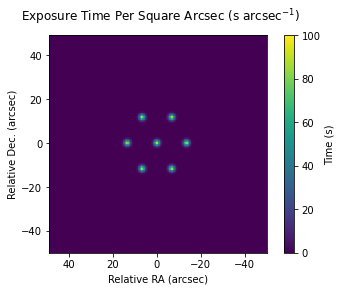

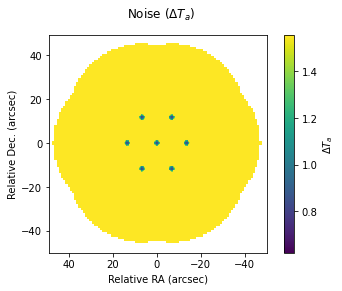

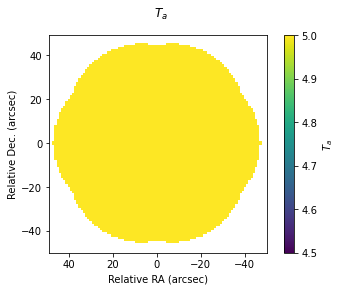

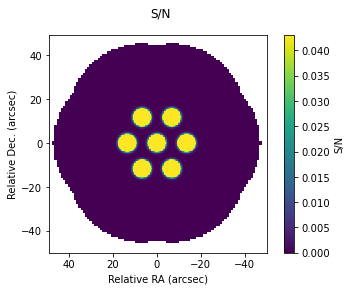

In [22]:



#Checking S/N calculations for a single HFA pointing

sky_grid = sens_map_lib.sky([-50,50], [-50,50], 1.0) #Generate sky object

sky_grid.uniform(5.0) #Give sky a 5 K uniform signal

#Generate a single pointing
hfa_array = sens_map_lib.HFA_array()
hfa_array.single_point(sky_grid, x=0., y=0., array_angle=0., time=100.0, cycles=1)

#Calculate
sky_grid.simulate_observation(Tsys=3886.0)

#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')

#Give final signal and noise
goodpix = np.isfinite(sky_grid.data) & np.isfinite(sky_grid.noise)
print('Signal = ', np.nansum(sky_grid.data[goodpix]))
print('Noise = ', np.nansum(sky_grid.noise[goodpix]))
print('min noise= ', np.nanmin(sky_grid.noise[goodpix]))
print('max S/N = ', np.nanmax(sky_grid.data[goodpix]/sky_grid.noise[goodpix]))

In [23]:
np.nanmin(sky_grid.data[np.isfinite(sky_grid.data)])

4.999999999999983

Total beam signal: 139.99999999999966
Total beam noise: 2.626108491285156
Total beam S/N: 53.31082111214946
total signal = 688979.9999999999
total noise =  inf
Total S/N:  0.0
Signal =  688979.9999999984
Noise =  3.7354195871671e+162
min noise=  0.14179653028195013
max S/N =  141.0471748513995


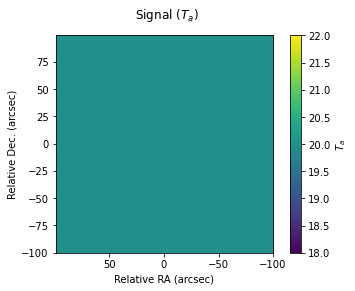

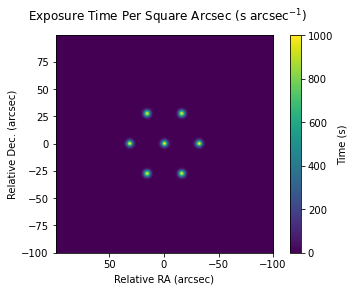

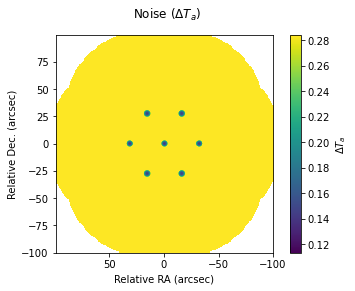

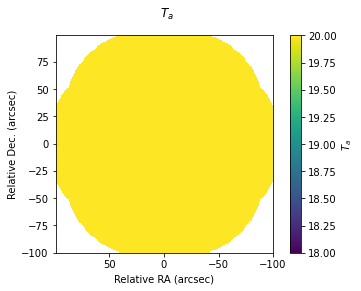

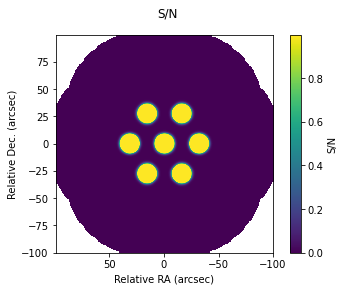

In [24]:
#Checking S/N calculations for a single LFA pointing

sky_grid = sens_map_lib.sky([-100,100], [-100,100], 1.0) #Generate sky object

sky_grid.uniform(20.0) #Give sky a 5 K uniform signal

#Generate a single pointing
hfa_array = sens_map_lib.LFAH_array()
hfa_array.single_point(sky_grid, x=0., y=0., array_angle=0., time=1000.0, cycles=1)

#Calculate
sky_grid.simulate_observation(Tsys=2242.0)

#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')

#Give final signal and noise
goodpix = np.isfinite(sky_grid.data) & np.isfinite(sky_grid.noise)
print('Signal = ', np.nansum(sky_grid.data[goodpix]))
print('Noise = ', np.nansum(sky_grid.noise[goodpix]))
print('min noise= ', np.nanmin(sky_grid.noise[goodpix]))
print('max S/N = ', np.nanmax(sky_grid.data[goodpix]/sky_grid.noise[goodpix]))

Total beam signal: 20.000000000001037
Total beam noise: 0.026373395685804282
Total beam S/N: 758.3399664672767
total signal = 3192700.0000000014
total noise =  inf
Total S/N:  0.0
Signal =  3192700.0000001634
Noise =  6.387265144996439e+161
min noise=  0.026373395685804282
max S/N =  758.3399664672767


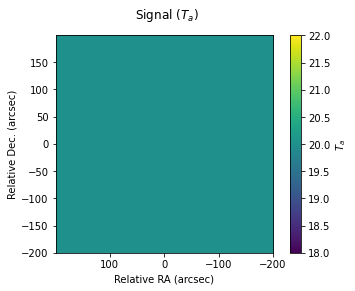

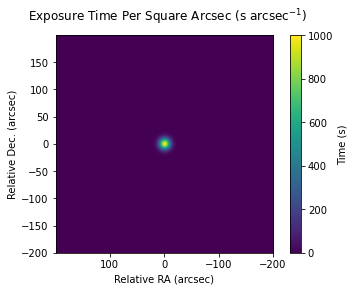

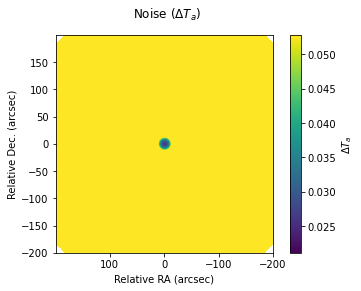

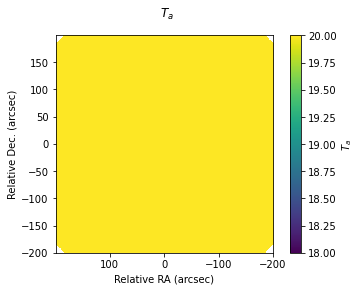

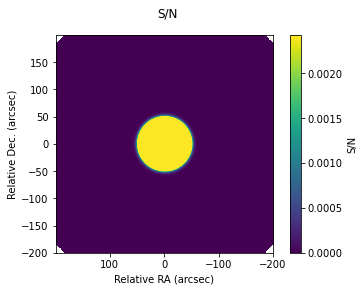

In [25]:
#Checking S/N calculations for a single 4G1 pointing

sky_grid = sens_map_lib.sky([-200.0,200.0], [-200.0,200.0], 1.0) #Generate sky object

sky_grid.uniform(20.0) #Give sky a 5 K uniform signal

#Generate a single pointing
fg1_array = sens_map_lib.FG1_array(freq=0.6)
fg1_array.single_point(sky_grid, x=0., y=0., array_angle=0., time=1000.0, cycles=1)

#Calculate
sky_grid.simulate_observation(Tsys=417.0)

#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')

#Give final signal and noise
goodpix = np.isfinite(sky_grid.data) & np.isfinite(sky_grid.noise)
print('Signal = ', np.nansum(sky_grid.data[goodpix]))
print('Noise = ', np.nansum(sky_grid.noise[goodpix]))
print('min noise= ', np.nanmin(sky_grid.noise[goodpix]))
print('max S/N = ', np.nanmax(sky_grid.data[goodpix]/sky_grid.noise[goodpix]))

Total beam signal: 2000.000000000101
Total beam noise: 50.165179647629266
Total beam S/N: 39.86829139352276
total signal = 3200000.0000000014
total noise =  1.7788752441770908e+51
Total S/N:  4.497223752023606e-48
Signal =  3200000.00000015
Noise =  5.7679141954598364e+51
min noise=  0.048379667422543966
max S/N =  413.3968062517405
max exp. time =  107.5174576616031


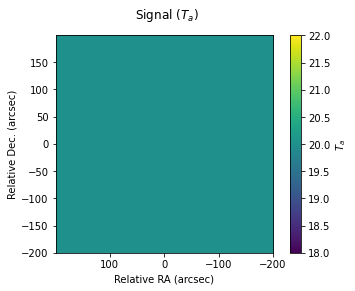

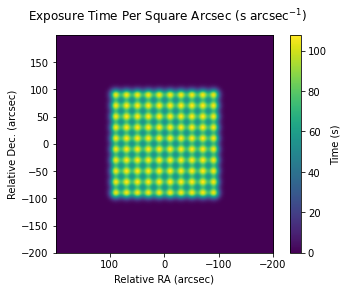

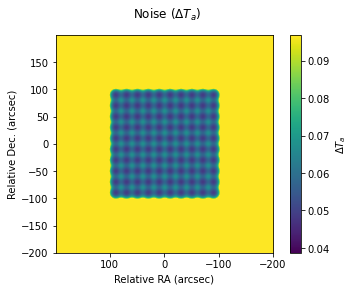

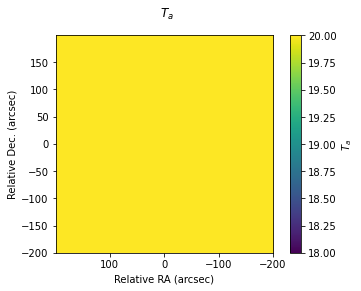

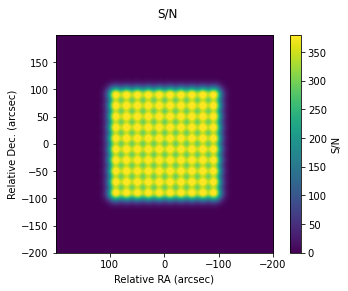

In [26]:
#Checking S/N calculations for a single 4G1 pointing

sky_grid = sens_map_lib.sky([-200.0,200.0], [-200.0,200.0], 1.0) #Generate sky object

sky_grid.uniform(20.0) #Give sky a 5 K uniform signal

#Generate a single pointing
fg1_array = sens_map_lib.FG1_array(freq=0.6)
fg1_array.map(sky_grid, x=0., y=0., nx=10, ny=10, dx=20.0, dy=20.0, array_angle=0., time=100.0, cycles=1)

#Calculate
sky_grid.simulate_observation(Tsys=417.0, TPOTF=True, Non=5)

#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')

#Give final signal and noise
goodpix = np.isfinite(sky_grid.data) & np.isfinite(sky_grid.noise)
print('Signal = ', np.nansum(sky_grid.data[goodpix]))
print('Noise = ', np.nansum(sky_grid.noise[goodpix]))
print('min noise= ', np.nanmin(sky_grid.noise[goodpix]))
print('max S/N = ', np.nanmax(sky_grid.data[goodpix]/sky_grid.noise[goodpix]))
print('max exp. time = ', np.nanmax(sky_grid.exptime[goodpix]))

In [27]:
# #Test boxcar convolving a 2D gaussian

# sky_grid = sens_map_lib.sky([-50,50], [-50,50], 0.5) #Generate sky object

# #Set parameters for 2D gaussian
# x = 0.
# y = 0.
# amplitude = 10.0
# fwhm = 10.0
# stddev = fwhm / (2.0 * np.sqrt(np.log(2.0)))#Convert FWHM to stddev
# point_source_gaussian = models.Gaussian2D(amplitude=amplitude, x_mean=x, y_mean=y, x_stddev=stddev, y_stddev=stddev)
# sky_grid.input(point_source_gaussian)

# sky_grid.plot(map_type='signal')

Total beam signal: 2.5139574410492282
Total beam noise: 14505.647227468102
Total beam S/N: 0.0001733088776823941
total signal = 3390.8255548432767
total noise =  14011743070.264784
Total S/N:  1.6133255930825455e-10


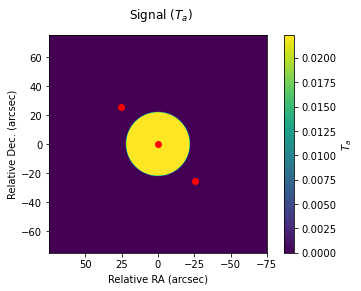

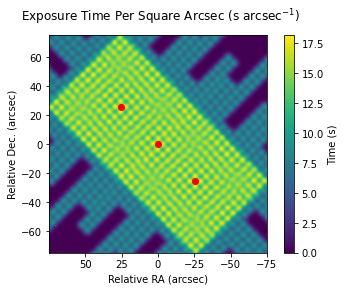

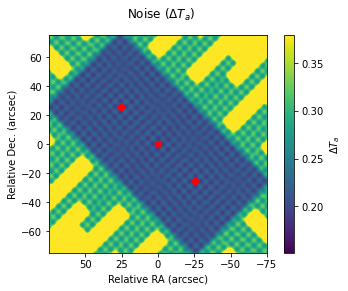

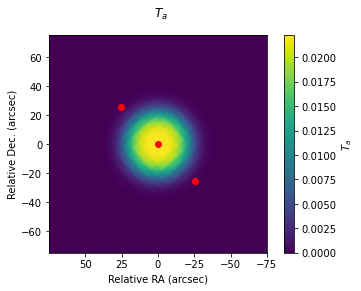

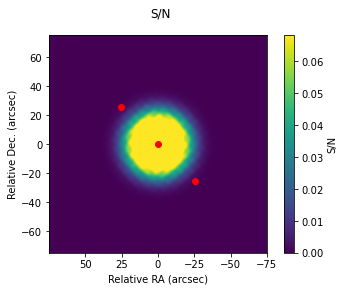

In [28]:
#Put the Bolatto project to the test
#Here we test the observations for NGC 0628

#Read in .aor file
aors = sens_map_lib.open_aors('07_0126.aor') #Read in .aor file the result is a list of aor objects

#Grab aor for NGC 0628
aor = aors[3]

#Generate sky object
sky_grid = sens_map_lib.sky([-75,75], [-75,75], .1) 

#Generate circle with shape and signal expected for [CII] in NGC 0628
circle = models.Disk2D(amplitude = 0.0223, x_0=0, y_0=0, R_0 = 22.0)
sky_grid.input(circle)



#Apply map from aor
aor.paint(sky_grid, 'LFAV')

sky_grid.simulate_observation(Tsys=2614.0, deltav=5.0)

#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')

total signal = 0.1324541232361848
total noise =  401505.2080783779
Total S/N:  3.665487896024402e-08


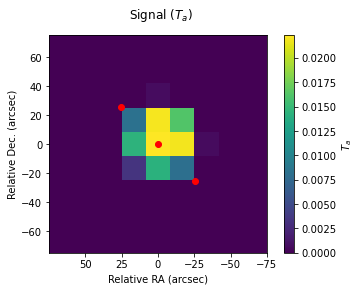

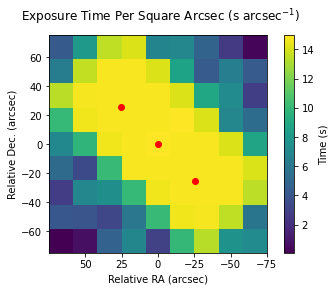

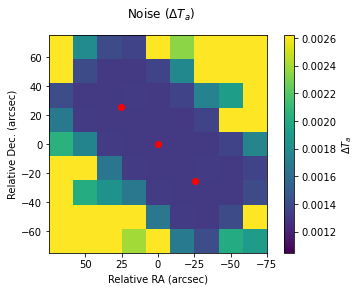

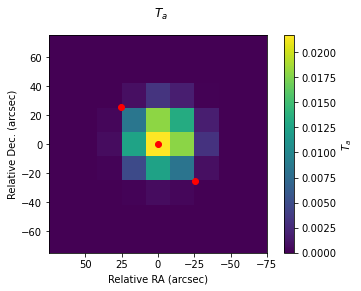

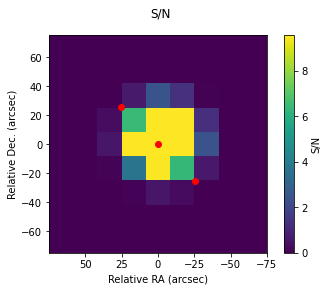

In [29]:
#Test downsampling to 10 arsecond pixels
factor = 16.0 / sky_grid.plate_scale
sky_grid.downsample(factor)

#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')

Total beam signal: 0.542512888643323
Total beam noise: 2151.474803114312
Total beam S/N: 0.00025215860667204766
total signal = 592.5020146158786
total noise =  4.305133341553652e+152
Total S/N:  2.2937811197661002e-153


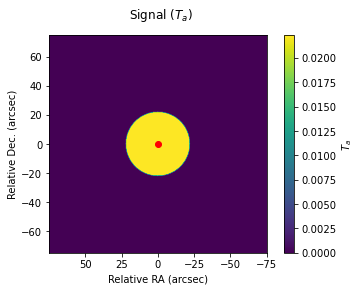

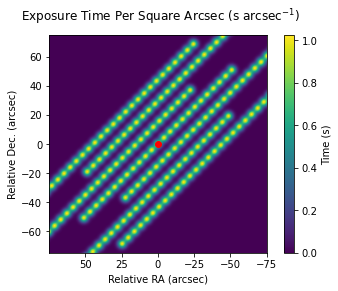

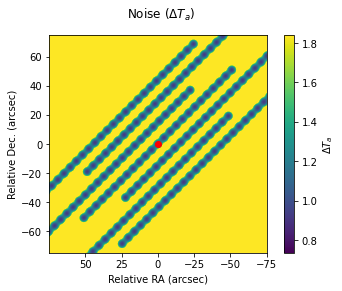

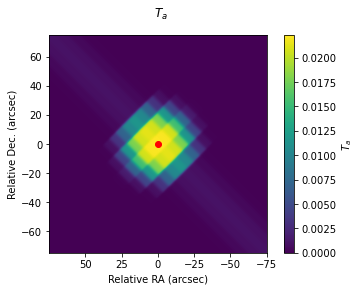

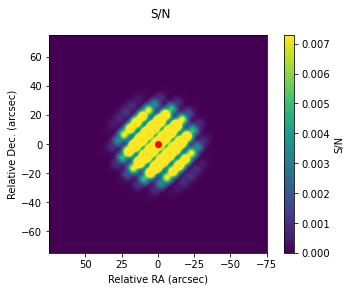

In [30]:
####TESTING EXPOSURE TIME AND NOISE CALCULATIONS FOR ARRAY OTF MAPPING




#Generate sky object
sky_grid = sens_map_lib.sky([-75,75], [-75,75], 0.25) 

#Generate circle with shape and signal expected for [CII] in NGC 0628
circle = models.Disk2D(amplitude = 0.0223, x_0=0, y_0=0, R_0 = 22.0)
sky_grid.input(circle)

lfa_array = sens_map_lib.LFAV_array()
#lfa_array.array_otf(sky_grid, nblock_scan=1, nblock_perp=1, x=0.0, y=0., step=5.2, length=3.0, time=1.0, cycles=8, map_angle=315., direction='x', nscans=2)
lfa_array.array_otf(sky_grid, nblock_scan=1, nblock_perp=1, x=0.0, y=0., step=6, length=2.0, time=1.0, cycles=1, map_angle=315., direction='y', nscans=1)


sky_grid.simulate_observation(Tsys=2614.0, deltav=5.0)

#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')

pyplot.figure()
sky_grid.plot('s2n')

In [31]:
# #Clear sky grid
# sky_grid.clear()

# #Test something like an OTF map on the sky
# lfa_array.map(sky_grid, x=50.0, y=50.0, array_angle=0.0, map_angle=30.0, nx=21, ny=21,
#                     dx=6.0, dy=6.0, time=1.0, cycles=5)

# #Show result
# sky_grid.plot()

In [32]:
# #Clear sky grid
# sky_grid.clear()

# #Test honeycomb map on the sky
# lfa_array.honeycomb(sky_grid, x=50.0, y=50.0, array_angle=0.0, map_angle=0.0, time=1.0, cycles=5)

# #Show result
# sky_grid.plot()

In [33]:
# #Read in .aor file and show what's inside, the result is a list of aor objects
# aors = sens_map_lib.open_aors('test.aor')

# #Set up a new sky grid for this
# sky_grid = sens_map_lib.sky([-100.0, 150.0], [-100.0, 150.0], 0.2)

In [34]:
# #Paint HFA first aor which is a single pointing
# sky_grid.clear() #Clear sky grid
# aors[0].paint(sky_grid, 'HFA') #Paint onto sky from aor

# #Show result
# sky_grid.plot()

In [35]:
# #Paint HFA second aor which is a Raster map
# sky_grid.clear() #Clear sky grid
# aors[1].paint(sky_grid, 'HFA') #Paint onto sky from aor

# #Show result
# sky_grid.plot()

In [36]:
# #Paint LFA third aor which is a OTF map
# sky_grid.clear() #Clear sky grid
# aors[2].paint(sky_grid, 'LFA') #Paint onto sky from aor

# #Show result
# sky_grid.plot()

In [37]:
# #Paint LFA fourth aor which is a honeycomb map
# sky_grid.clear() #Clear sky grid
# aors[3].paint(sky_grid, 'LFA') #Paint onto sky from aor

# #Show result
# sky_grid.plot()

In [38]:
# #Overplot all AORs for the LFA

# sky_grid.clear() #Clear sky grid
# for aor in aors:
#     aor.paint(sky_grid, 'LFA') #Paint onto sky from aor

# #Show result
# sky_grid.plot()

In [39]:
# #Test reading in 4GREAT from an AOR

# sky_grid.clear() #Clear sky grid
# aors = sens_map_lib.open_aors('test2.aor')#Read in AORs

# #Single pointing
# aor = aors[0] #Grab a single pointing
# figure()
# sky_grid.clear()
# suptitle('4G1 Single Pointing')
# aor.paint(sky_grid, '4G1')
# sky_grid.plot()
# figure()
# sky_grid.clear()
# suptitle('4G2 Single Pointing')
# aor.paint(sky_grid, '4G2')
# sky_grid.plot()
# figure()
# sky_grid.clear()
# suptitle('4G3 Single Pointing')
# aor.paint(sky_grid, '4G3')
# sky_grid.plot()
# figure()
# sky_grid.clear()
# suptitle('4G4 Single Pointing')
# aor.paint(sky_grid, '4G4')
# sky_grid.plot()

# #Raster Map
# aor = aors[1] #Grab raster map
# figure()
# sky_grid.clear()
# suptitle('4G1 Raster Map')
# aor.paint(sky_grid, '4G1')
# sky_grid.plot()
# figure()
# sky_grid.clear()
# suptitle('4G2 Raster Map')
# aor.paint(sky_grid, '4G2')
# sky_grid.plot()
# figure()
# sky_grid.clear()
# suptitle('4G3 Raster Map')
# aor.paint(sky_grid, '4G3')
# sky_grid.plot()
# figure()
# sky_grid.clear()
# suptitle('4G4 Raster Map')
# aor.paint(sky_grid, '4G4')
# sky_grid.plot()

# #OTF Map
# aor = aors[2] #Grab OTF map
# figure()
# sky_grid.clear()
# suptitle('4G1 OTF Map')
# aor.paint(sky_grid, '4G1')
# sky_grid.plot()
# figure()
# sky_grid.clear()
# suptitle('4G2 OTF Map')
# aor.paint(sky_grid, '4G2')
# sky_grid.plot()
# figure()
# sky_grid.clear()
# suptitle('4G3 OTF Map')
# aor.paint(sky_grid, '4G3')
# sky_grid.plot()
# figure()
# sky_grid.clear()
# suptitle('4G4 OTF Map')
# aor.paint(sky_grid, '4G4')
# sky_grid.plot()